In [1]:
import os
from os.path import expanduser
import socket
import sys
import glob

# BELOW IS SYSTEM/PATH CONFIGURATION #
my_home = expanduser("~")
running_system = socket.gethostname()
# Configure machine's names here #
systemHLRN = 'blogin1'
systemLOCAL = 'Laurents-MacBook-Pro.local'
my_home = expanduser("~")
# Define local pass #
wd_path = '/home/hbkoziel/pyfesom/'
save_path = wd_path+'/figures/Arc12/FINAL2/'

#sys.path.append("codes/modules") # add custom Vibe 's modules
sys.path.append('../..') # add standard 's modules
sys.path.append('../modules')
#########################################

In [2]:
import pyfesom as pf
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.basemap import Basemap
import numpy as np
from netCDF4 import Dataset
import os
import time

import xarray as xr
import pandas as pd
sys.path.append('/home/hbkoziel/pyfesom/pyfesom/cmocean/')
import cmocean as cmap

No joblib
no cmocean


In [3]:
# Loading mesh for run

mesh_id    = 'meshArc4.5'
meshpath   = '/scratch/usr/hbkoziel/mesh/'+mesh_id+'/'            # Defining path where mesh is stored
mesh = pf.load_mesh(meshpath, usepickle=True, get3d=True)                                    # Loading mesh, stores it in mesh.****  
#mesh = pf.fesom_mesh(meshpath, get3d=True)
#mesh.zlevs = -mesh.zlevs                                            # Depth is made negative

first_year = 1985
last_year  = 2015
years      = np.arange(first_year,last_year+1,1)
runid	= 'Arc12'

data_path  = '/scratch/usr/hbkoziel/'+runid+'/netcdf_monthly/'

/scratch/usr/hbkoziel/mesh/meshArc4.5/pickle_mesh
2
The usepickle == True)
The pickle file for python 2 exists.
The mesh will be loaded from /scratch/usr/hbkoziel/mesh/meshArc4.5/pickle_mesh


In [4]:
ind_all = np.load('index_all.npy')
ind_all

array([191974, 191973, 191975, ..., 711906, 711930, 711931])

In [5]:
tracername = 'MLD'
time = pd.date_range('1985-01-01', freq="MS", periods= 12*len(np.arange(1985,2016,1)))
data = xr.open_mfdataset(data_path+tracername+'*.nc', concat_dim='time')
data['time'] = time

MLD_sel = data.MLD.sel(time=slice(str(first_year)+'-01-01', str(last_year)+'-12-31'))
MLD_sel = MLD_sel.compute()

# CUR_march = CUR_sel[data['time.month']==3]
# CUR_march = CUR_march.compute()

MLD_sept = MLD_sel[data['time.month']==8]
MLD_sept = MLD_sept.compute()
MLD_sept_mean = MLD_sept.mean(dim='time')
MLD_sept_mean = MLD_sept_mean.compute()

MLD_march = MLD_sel[data['time.month']==2]
MLD_march = MLD_march.compute()
MLD_march_mean = MLD_march.mean(dim='time')
MLD_march_mean = MLD_march_mean.compute()

# pff = np.polyfit(years, MLD_sept, 1)
# MLD_trend = pff[0]

In [6]:
tracername = 'NUTRICLINE2'
time = pd.date_range('1985-01-01', freq="MS", periods= 12*len(np.arange(1985,2016,1)))
data = xr.open_mfdataset(data_path+tracername+'*.nc', concat_dim='time')
data['time'] = time

NUT_sel = data.NUT.sel(time=slice(str(first_year)+'-01-01', str(last_year)+'-12-31'))
NUT_sel = NUT_sel.compute()

# CUR_march = CUR_sel[data['time.month']==3]
# CUR_march = CUR_march.compute()

NUT_sept = NUT_sel[data['time.month']==8]
NUT_sept = NUT_sept.compute()
NUT_sept_mean = NUT_sept.mean(dim='time')
NUT_sept_mean = NUT_sept_mean.compute()

NUT_march = NUT_sel[data['time.month']==2]
NUT_march = NUT_march.compute()
NUT_march_mean = NUT_march.mean(dim='time')
NUT_march_mean = NUT_march_mean.compute()

# pff = np.polyfit(years, MLD_sept, 1)
# MLD_trend = pff[0]

/sw/tools/anaconda2/2019.10/skl/lib/python2.7/site-packages/xarray/core/nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


In [7]:
A = MLD_march_mean/NUT_march_mean
B = MLD_sept_mean/NUT_sept_mean
np.shape(A)

(753179,)

For depth 0 model level -0.0 will be used


/sw/tools/anaconda2/2019.10/skl/lib/python2.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in less_equal
  # Remove the CWD from sys.path while we load stuff.
/sw/tools/anaconda2/2019.10/skl/lib/python2.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in greater_equal
  # This is added back by InteractiveShellApp.init_path()


For depth 0 model level -0.0 will be used


/sw/tools/anaconda2/2019.10/skl/lib/python2.7/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in less_equal
/sw/tools/anaconda2/2019.10/skl/lib/python2.7/site-packages/ipykernel_launcher.py:34: RuntimeWarning: invalid value encountered in greater_equal
/sw/tools/anaconda2/2019.10/skl/lib/python2.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in less_equal
/sw/tools/anaconda2/2019.10/skl/lib/python2.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: invalid value encountered in greater_equal


For depth 0 model level -0.0 will be used


/sw/tools/anaconda2/2019.10/skl/lib/python2.7/site-packages/ipykernel_launcher.py:61: RuntimeWarning: invalid value encountered in less_equal
/sw/tools/anaconda2/2019.10/skl/lib/python2.7/site-packages/ipykernel_launcher.py:62: RuntimeWarning: invalid value encountered in greater_equal


For depth 0 model level -0.0 will be used
For depth 0 model level -0.0 will be used


/sw/tools/anaconda2/2019.10/skl/lib/python2.7/site-packages/ipykernel_launcher.py:101: RuntimeWarning: invalid value encountered in less_equal
/sw/tools/anaconda2/2019.10/skl/lib/python2.7/site-packages/ipykernel_launcher.py:102: RuntimeWarning: invalid value encountered in greater_equal


For depth 0 model level -0.0 will be used


/sw/tools/anaconda2/2019.10/skl/lib/python2.7/site-packages/ipykernel_launcher.py:118: RuntimeWarning: invalid value encountered in less_equal
/sw/tools/anaconda2/2019.10/skl/lib/python2.7/site-packages/ipykernel_launcher.py:119: RuntimeWarning: invalid value encountered in greater_equal


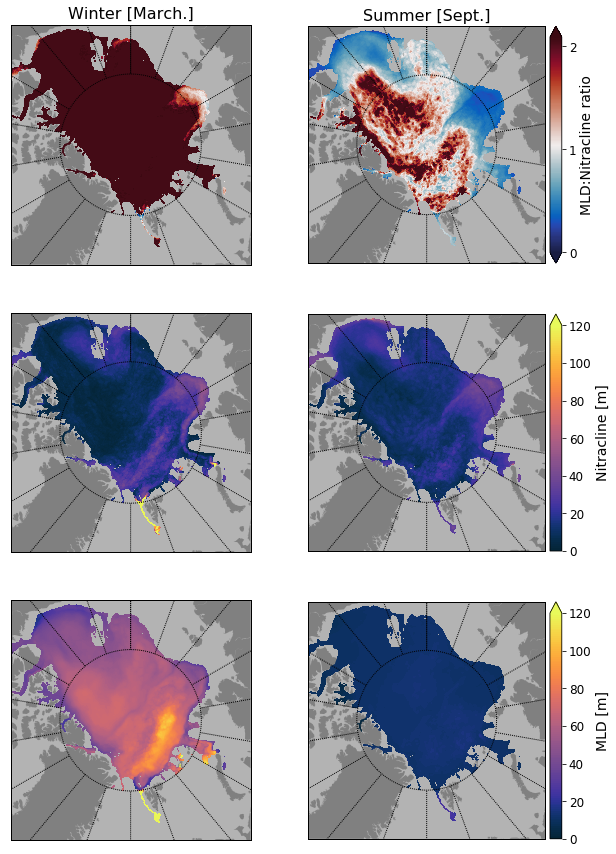

In [8]:
fig = plt.figure(figsize=(10, 15), facecolor='w', edgecolor='k')

contours = np.arange(0, 2.1, .01)

#MLD_sept_mean[MLD_sept_mean == 0] = np.nan
data = np.empty(np.shape(A))*np.nan
data[ind_all]=A[ind_all]
data, elem_no_nan = pf.get_data(data,mesh,0)
eps=(contours.max()-contours.min())/100.
data[data<=contours.min()]=contours.min()+eps
data[data>=contours.max()]=contours.max()-eps
ax1      = fig.add_subplot(321)
m = Basemap(projection='nplaea',boundinglat=73,lon_0=0,resolution='l')
x, y = m(mesh.x2, mesh.y2)
plabels=[False,False,False,False]
mlabels=[False,False,False,False]    
m.drawparallels(np.arange(-80.,81.,20.), labels=plabels)
m.drawmeridians(np.arange(-180.,181.,20.),labels=mlabels) #[0,1,0,0]
m.drawmapboundary(fill_color='0.7')
m.fillcontinents(color='.5',lake_color='.7')
im=plt.tricontourf(x, y, elem_no_nan, (data) , levels=contours, cmap=cmap.cm.balance, extend='both')
# label = 'MLD:Nitracline ratio'
# cbar=m.colorbar(im,"bottom", size="5%", pad="2%", ticks = np.arange(-1, 1.1, 1))
# cbar.set_label(label, fontsize=14)
# cbar.ax.tick_params(labelsize=12)
plt.title('Winter [March.]', fontsize=16)

#MLD_trend[MLD_trend == 0] = np.nan
data = np.empty(np.shape(B))*np.nan
data[ind_all]=B[ind_all]
data2, elem_no_nan = pf.get_data(data,mesh,0)
eps=(contours.max()-contours.min())/100.
data[data<=contours.min()]=contours.min()+eps
data[data>=contours.max()]=contours.max()-eps
ax2      = fig.add_subplot(322)
m = Basemap(projection='nplaea',boundinglat=73,lon_0=0,resolution='l')
x, y = m(mesh.x2, mesh.y2)
#map.drawcoastlines()
plabels=[False,False,False,False]
mlabels=[False,False,False,False]    
m.drawparallels(np.arange(-80.,81.,20.), labels=plabels)
m.drawmeridians(np.arange(-180.,181.,20.),labels=mlabels) #[0,1,0,0]
m.drawmapboundary(fill_color='0.7')
m.fillcontinents(color='.5',lake_color='.7')
eps=(contours.max()-contours.min())/100.
data2[data2<=contours.min()]=contours.min()+eps
data2[data2>=contours.max()]=contours.max()-eps
im=plt.tricontourf(x, y, elem_no_nan, data2, levels=contours, cmap=cmap.cm.balance, extend='both')
label = 'MLD:Nitracline ratio'
cbar=m.colorbar(im,"right", size="5%", pad="2%", ticks = np.arange(0, 2.1, 1))
cbar.set_label(label, fontsize=14)
cbar.ax.tick_params(labelsize=12)
plt.title('Summer [Sept.]', fontsize=16)

contours = np.arange(0, 121, 1)

data1 = np.empty(np.shape(A))*np.nan
data1[ind_all]=NUT_march_mean[ind_all]
data, elem_no_nan = pf.get_data(data1,mesh,0)
eps=(contours.max()-contours.min())/100.
data[data<=contours.min()]=contours.min()+eps
data[data>=contours.max()]=contours.max()-eps
ax3      = fig.add_subplot(323)
m = Basemap(projection='nplaea',boundinglat=73,lon_0=0,resolution='l')
x, y = m(mesh.x2, mesh.y2)
plabels=[False,False,False,False]
mlabels=[False,False,False,False]    
m.drawparallels(np.arange(-80.,81.,20.), labels=plabels)
m.drawmeridians(np.arange(-180.,181.,20.),labels=mlabels) #[0,1,0,0]
m.drawmapboundary(fill_color='0.7')
m.fillcontinents(color='.5',lake_color='.7')
im=plt.tricontourf(x, y, elem_no_nan, (data) , levels=contours, cmap=cmap.cm.thermal, extend='max')

data2 = np.empty(np.shape(A))*np.nan
data2[ind_all]=NUT_sept_mean[ind_all]
data, elem_no_nan = pf.get_data(data2,mesh,0)
# eps=(contours.max()-contours.min())/100.
# data[data<=contours.min()]=contours.min()+eps
# data[data>=contours.max()]=contours.max()-eps
ax4      = fig.add_subplot(324)
m = Basemap(projection='nplaea',boundinglat=73,lon_0=0,resolution='l')
x, y = m(mesh.x2, mesh.y2)
plabels=[False,False,False,False]
mlabels=[False,False,False,False]    
m.drawparallels(np.arange(-80.,81.,20.), labels=plabels)
m.drawmeridians(np.arange(-180.,181.,20.),labels=mlabels) #[0,1,0,0]
m.drawmapboundary(fill_color='0.7')
m.fillcontinents(color='.5',lake_color='.7')
im=plt.tricontourf(x, y, elem_no_nan, (data) , levels=contours, cmap=cmap.cm.thermal, extend='max')

label = 'Nitracline [m]'
cbar=m.colorbar(im,"right", size="5%", pad="2%", ticks = np.arange(0, 121, 20))
cbar.set_label(label, fontsize=14)
cbar.ax.tick_params(labelsize=12)


data3 = np.empty(np.shape(A))*np.nan
data3[ind_all]=MLD_march_mean[ind_all]
data, elem_no_nan = pf.get_data(data3,mesh,0)
eps=(contours.max()-contours.min())/100.
data[data<=contours.min()]=contours.min()+eps
data[data>=contours.max()]=contours.max()-eps
ax5      = fig.add_subplot(325)
m = Basemap(projection='nplaea',boundinglat=73,lon_0=0,resolution='l')
x, y = m(mesh.x2, mesh.y2)
plabels=[False,False,False,False]
mlabels=[False,False,False,False]    
m.drawparallels(np.arange(-80.,81.,20.), labels=plabels)
m.drawmeridians(np.arange(-180.,181.,20.),labels=mlabels) #[0,1,0,0]
m.drawmapboundary(fill_color='0.7')
m.fillcontinents(color='.5',lake_color='.7')
im=plt.tricontourf(x, y, elem_no_nan, (data) , levels=contours, cmap=cmap.cm.thermal, extend='max')

data4 = np.empty(np.shape(A)) *np.nan
data4[ind_all]=MLD_sept_mean[ind_all]
data, elem_no_nan = pf.get_data(data4,mesh,0)
eps=(contours.max()-contours.min())/100.
data[data<=contours.min()]=contours.min()+eps
data[data>=contours.max()]=contours.max()-eps
ax6      = fig.add_subplot(326)
m = Basemap(projection='nplaea',boundinglat=73,lon_0=0,resolution='l')
x, y = m(mesh.x2, mesh.y2)
plabels=[False,False,False,False]
mlabels=[False,False,False,False]    
m.drawparallels(np.arange(-80.,81.,20.), labels=plabels)
m.drawmeridians(np.arange(-180.,181.,20.),labels=mlabels) #[0,1,0,0]
m.drawmapboundary(fill_color='0.7')
m.fillcontinents(color='.5',lake_color='.7')
im=plt.tricontourf(x, y, elem_no_nan, (data) , levels=contours, cmap=cmap.cm.thermal, extend='max')

label = 'MLD [m]'
cbar=m.colorbar(im,"right", size="5%", pad="2%", ticks = np.arange(0, 121, 20))
cbar.set_label(label, fontsize=14)
cbar.ax.tick_params(labelsize=12)

In [9]:
tracername = 'NUTRICLINE.'
time = pd.date_range('1985-01-01', freq="MS", periods= 12*len(np.arange(1985,2016,1)))
data = xr.open_mfdataset(data_path+tracername+'*.nc', concat_dim='time')
data['time'] = time

NUT_sel = data.NUT.sel(time=slice(str(first_year)+'-01-01', str(last_year)+'-12-31'))
NUT_sel = NUT_sel.compute()

# CUR_march = CUR_sel[data['time.month']==3]
# CUR_march = CUR_march.compute()

NUT_sept = NUT_sel[data['time.month']==8]
NUT_sept = NUT_sept.compute()
NUT_sept_mean = NUT_sept.mean(dim='time')
NUT_sept_mean = NUT_sept_mean.compute()

NUT_march = NUT_sel[data['time.month']==2]
NUT_march = NUT_march.compute()
NUT_march_mean = NUT_march.mean(dim='time')
NUT_march_mean = NUT_march_mean.compute()

# pff = np.polyfit(years, MLD_sept, 1)
# MLD_trend = pff[0]

In [10]:
A = MLD_march_mean/NUT_march_mean
B = MLD_sept_mean/NUT_sept_mean
np.shape(A)

(753179,)

For depth 0 model level -0.0 will be used


/sw/tools/anaconda2/2019.10/skl/lib/python2.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in less_equal
  # Remove the CWD from sys.path while we load stuff.
/sw/tools/anaconda2/2019.10/skl/lib/python2.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in greater_equal
  # This is added back by InteractiveShellApp.init_path()


For depth 0 model level -0.0 will be used


/sw/tools/anaconda2/2019.10/skl/lib/python2.7/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in less_equal
/sw/tools/anaconda2/2019.10/skl/lib/python2.7/site-packages/ipykernel_launcher.py:34: RuntimeWarning: invalid value encountered in greater_equal
/sw/tools/anaconda2/2019.10/skl/lib/python2.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in less_equal
/sw/tools/anaconda2/2019.10/skl/lib/python2.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: invalid value encountered in greater_equal


For depth 0 model level -0.0 will be used


/sw/tools/anaconda2/2019.10/skl/lib/python2.7/site-packages/ipykernel_launcher.py:61: RuntimeWarning: invalid value encountered in less_equal
/sw/tools/anaconda2/2019.10/skl/lib/python2.7/site-packages/ipykernel_launcher.py:62: RuntimeWarning: invalid value encountered in greater_equal


For depth 0 model level -0.0 will be used
For depth 0 model level -0.0 will be used


/sw/tools/anaconda2/2019.10/skl/lib/python2.7/site-packages/ipykernel_launcher.py:101: RuntimeWarning: invalid value encountered in less_equal
/sw/tools/anaconda2/2019.10/skl/lib/python2.7/site-packages/ipykernel_launcher.py:102: RuntimeWarning: invalid value encountered in greater_equal


For depth 0 model level -0.0 will be used


/sw/tools/anaconda2/2019.10/skl/lib/python2.7/site-packages/ipykernel_launcher.py:118: RuntimeWarning: invalid value encountered in less_equal
/sw/tools/anaconda2/2019.10/skl/lib/python2.7/site-packages/ipykernel_launcher.py:119: RuntimeWarning: invalid value encountered in greater_equal


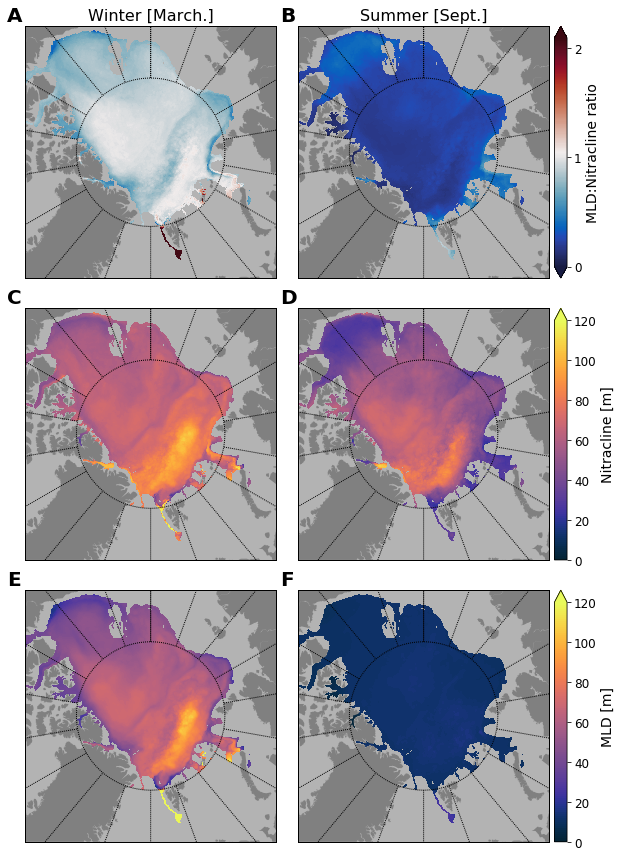

In [15]:
fig = plt.figure(figsize=(10, 15), facecolor='w', edgecolor='k')

contours = np.arange(0, 2.1, .01)

#MLD_sept_mean[MLD_sept_mean == 0] = np.nan
data = np.empty(np.shape(A))*np.nan
data[ind_all]=A[ind_all]
data, elem_no_nan = pf.get_data(data,mesh,0)
eps=(contours.max()-contours.min())/100.
data[data<=contours.min()]=contours.min()+eps
data[data>=contours.max()]=contours.max()-eps
ax1      = fig.add_subplot(321)
m = Basemap(projection='nplaea',boundinglat=73,lon_0=0,resolution='l')
x, y = m(mesh.x2, mesh.y2)
plabels=[False,False,False,False]
mlabels=[False,False,False,False]    
m.drawparallels(np.arange(-80.,81.,20.), labels=plabels)
m.drawmeridians(np.arange(-180.,181.,20.),labels=mlabels) #[0,1,0,0]
m.drawmapboundary(fill_color='0.7')
m.fillcontinents(color='.5',lake_color='.7')
im=plt.tricontourf(x, y, elem_no_nan, (data) , levels=contours, cmap=cmap.cm.balance, extend='both')
# label = 'MLD:Nitracline ratio'
# cbar=m.colorbar(im,"bottom", size="5%", pad="2%", ticks = np.arange(-1, 1.1, 1))
# cbar.set_label(label, fontsize=14)
# cbar.ax.tick_params(labelsize=12)
plt.title('Winter [March.]', fontsize=16)

#MLD_trend[MLD_trend == 0] = np.nan
data = np.empty(np.shape(B))*np.nan
data[ind_all]=B[ind_all]
data2, elem_no_nan = pf.get_data(data,mesh,0)
eps=(contours.max()-contours.min())/100.
data[data<=contours.min()]=contours.min()+eps
data[data>=contours.max()]=contours.max()-eps
ax2      = fig.add_subplot(322)
m = Basemap(projection='nplaea',boundinglat=73,lon_0=0,resolution='l')
x, y = m(mesh.x2, mesh.y2)
#map.drawcoastlines()
plabels=[False,False,False,False]
mlabels=[False,False,False,False]    
m.drawparallels(np.arange(-80.,81.,20.), labels=plabels)
m.drawmeridians(np.arange(-180.,181.,20.),labels=mlabels) #[0,1,0,0]
m.drawmapboundary(fill_color='0.7')
m.fillcontinents(color='.5',lake_color='.7')
eps=(contours.max()-contours.min())/100.
data2[data2<=contours.min()]=contours.min()+eps
data2[data2>=contours.max()]=contours.max()-eps
im=plt.tricontourf(x, y, elem_no_nan, data2, levels=contours, cmap=cmap.cm.balance, extend='both')
label = 'MLD:Nitracline ratio'
cbar=m.colorbar(im,"right", size="5%", pad="2%", ticks = np.arange(0, 2.1, 1))
cbar.set_label(label, fontsize=14)
cbar.ax.tick_params(labelsize=12)
plt.title('Summer [Sept.]', fontsize=16)

contours = np.arange(0, 121, 1)

data1 = np.empty(np.shape(A))*np.nan
data1[ind_all]=NUT_march_mean[ind_all]
data, elem_no_nan = pf.get_data(data1,mesh,0)
eps=(contours.max()-contours.min())/100.
data[data<=contours.min()]=contours.min()+eps
data[data>=contours.max()]=contours.max()-eps
ax3      = fig.add_subplot(323)
m = Basemap(projection='nplaea',boundinglat=73,lon_0=0,resolution='l')
x, y = m(mesh.x2, mesh.y2)
plabels=[False,False,False,False]
mlabels=[False,False,False,False]    
m.drawparallels(np.arange(-80.,81.,20.), labels=plabels)
m.drawmeridians(np.arange(-180.,181.,20.),labels=mlabels) #[0,1,0,0]
m.drawmapboundary(fill_color='0.7')
m.fillcontinents(color='.5',lake_color='.7')
im=plt.tricontourf(x, y, elem_no_nan, (data) , levels=contours, cmap=cmap.cm.thermal, extend='max')

data2 = np.empty(np.shape(A))*np.nan
data2[ind_all]=NUT_sept_mean[ind_all]
data, elem_no_nan = pf.get_data(data2,mesh,0)
# eps=(contours.max()-contours.min())/100.
# data[data<=contours.min()]=contours.min()+eps
# data[data>=contours.max()]=contours.max()-eps
ax4      = fig.add_subplot(324)
m = Basemap(projection='nplaea',boundinglat=73,lon_0=0,resolution='l')
x, y = m(mesh.x2, mesh.y2)
plabels=[False,False,False,False]
mlabels=[False,False,False,False]    
m.drawparallels(np.arange(-80.,81.,20.), labels=plabels)
m.drawmeridians(np.arange(-180.,181.,20.),labels=mlabels) #[0,1,0,0]
m.drawmapboundary(fill_color='0.7')
m.fillcontinents(color='.5',lake_color='.7')
im=plt.tricontourf(x, y, elem_no_nan, (data) , levels=contours, cmap=cmap.cm.thermal, extend='max')

label = 'Nitracline [m]'
cbar=m.colorbar(im,"right", size="5%", pad="2%", ticks = np.arange(0, 121, 20))
cbar.set_label(label, fontsize=14)
cbar.ax.tick_params(labelsize=12)


data3 = np.empty(np.shape(A))*np.nan
data3[ind_all]=MLD_march_mean[ind_all]
data, elem_no_nan = pf.get_data(data3,mesh,0)
eps=(contours.max()-contours.min())/100.
data[data<=contours.min()]=contours.min()+eps
data[data>=contours.max()]=contours.max()-eps
ax5      = fig.add_subplot(325)
m = Basemap(projection='nplaea',boundinglat=73,lon_0=0,resolution='l')
x, y = m(mesh.x2, mesh.y2)
plabels=[False,False,False,False]
mlabels=[False,False,False,False]    
m.drawparallels(np.arange(-80.,81.,20.), labels=plabels)
m.drawmeridians(np.arange(-180.,181.,20.),labels=mlabels) #[0,1,0,0]
m.drawmapboundary(fill_color='0.7')
m.fillcontinents(color='.5',lake_color='.7')
im=plt.tricontourf(x, y, elem_no_nan, (data) , levels=contours, cmap=cmap.cm.thermal, extend='max')

data4 = np.empty(np.shape(A)) *np.nan
data4[ind_all]=MLD_sept_mean[ind_all]
data, elem_no_nan = pf.get_data(data4,mesh,0)
eps=(contours.max()-contours.min())/100.
data[data<=contours.min()]=contours.min()+eps
data[data>=contours.max()]=contours.max()-eps
ax6      = fig.add_subplot(326)
m = Basemap(projection='nplaea',boundinglat=73,lon_0=0,resolution='l')
x, y = m(mesh.x2, mesh.y2)
plabels=[False,False,False,False]
mlabels=[False,False,False,False]    
m.drawparallels(np.arange(-80.,81.,20.), labels=plabels)
m.drawmeridians(np.arange(-180.,181.,20.),labels=mlabels) #[0,1,0,0]
m.drawmapboundary(fill_color='0.7')
m.fillcontinents(color='.5',lake_color='.7')
im=plt.tricontourf(x, y, elem_no_nan, (data) , levels=contours, cmap=cmap.cm.thermal, extend='max')

label = 'MLD [m]'
cbar=m.colorbar(im,"right", size="5%", pad="2%", ticks = np.arange(0, 121, 20))
cbar.set_label(label, fontsize=14)
cbar.ax.tick_params(labelsize=12)

ax1.text(-0.07, 1.02, 'A', transform=ax1.transAxes,
            size=20, weight='bold')
ax2.text(-0.07, 1.02, 'B', transform=ax2.transAxes,
            size=20, weight='bold')
ax3.text(-0.07, 1.02, 'C', transform=ax3.transAxes,
            size=20, weight='bold')
ax4.text(-0.07, 1.02, 'D', transform=ax4.transAxes,
            size=20, weight='bold')
ax5.text(-0.07, 1.02, 'E', transform=ax5.transAxes,
            size=20, weight='bold')
ax6.text(-0.07, 1.02, 'F', transform=ax6.transAxes,
            size=20, weight='bold')

fig.subplots_adjust(wspace=0.02,hspace=0.12)

plt.savefig(save_path+'map_mldnut.png', dpi = 300, bbox_inches='tight') 

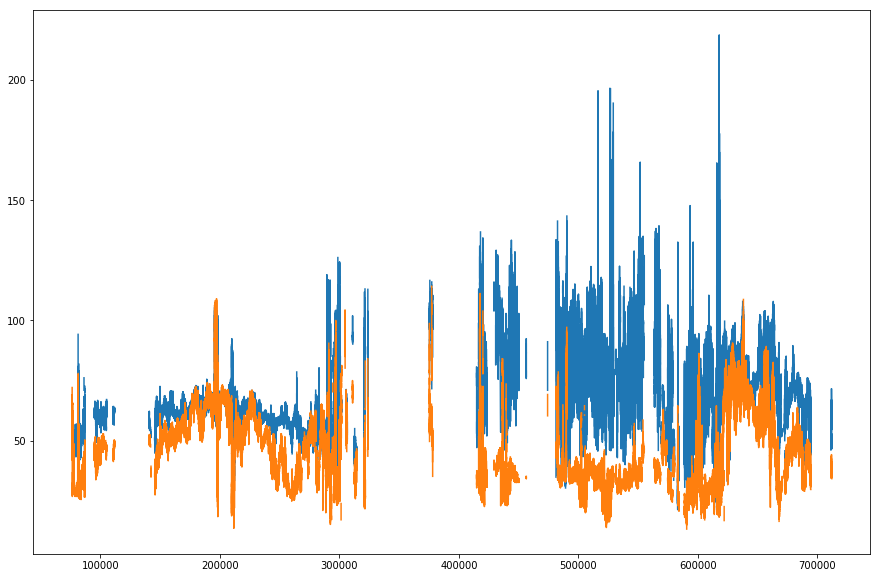

In [12]:
fig = plt.figure(figsize=(15, 10), facecolor='w', edgecolor='k')
plt.plot(NUT_march_mean)
plt.plot(NUT_sept_mean)